# Checkpoint 2

## Data Preprocessing

In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from scipy.stats import ttest_ind
from scipy import stats

intro_vs_extro_df = pd.read_csv('introvert_vs_extrovert.csv')
student_habit_df = pd.read_csv('student_habits_performance.csv')
student_performance_df = pd.read_csv('CSE_student_performances.csv')

In [ ]:
# Parsing
intro_vs_extro_df['Stage_fear'] = intro_vs_extro_df['Stage_fear'].astype('string')
intro_vs_extro_df['Drained_after_socializing'] = intro_vs_extro_df['Drained_after_socializing'].astype('string')
intro_vs_extro_df['Personality'] = intro_vs_extro_df['Personality'].astype('string')


student_habit_df['gender'] = student_habit_df['gender'].astype('string')
student_habit_df['part_time_job'] = student_habit_df['part_time_job'].astype('string')
student_habit_df['diet_quality'] = student_habit_df['diet_quality'].astype('string')
student_habit_df['parental_education_level'] = student_habit_df['parental_education_level'].astype('string')
student_habit_df['internet_quality'] = student_habit_df['internet_quality'].astype('string')
student_habit_df['extracurricular_participation'] = student_habit_df['extracurricular_participation'].astype('string')


student_performance_df['Gender'] = student_performance_df['Gender'].astype('string')
student_performance_df['AcademicPerformance'] = student_performance_df['AcademicPerformance'].astype('string')
student_performance_df['TakingNoteInClass'] = student_performance_df['TakingNoteInClass'].astype('string')
student_performance_df['DepressionStatus'] = student_performance_df['DepressionStatus'].astype('string')
student_performance_df['FaceChallangesToCompleteAcademicTask'] = student_performance_df['FaceChallangesToCompleteAcademicTask'].astype('string')
student_performance_df['LikePresentation'] = student_performance_df['LikePresentation'].astype('string')
student_performance_df['LikeNewThings'] = student_performance_df['LikeNewThings'].astype('string')

In [ ]:
# Database/frame setup
display(intro_vs_extro_df)
display(student_habit_df)
display(student_performance_df)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,Male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,Male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes
...,...,...,...,...,...,...,...,...,...,...
94,21,Male,Good,Yes,Sometimes,Yes,Yes,6,4.0,Yes
95,21,Female,Good,Yes,Yes,No,Yes,6,6.0,Yes
96,25,Male,Good,Yes,Sometimes,No,Yes,4,9.0,No
97,21,Male,Good,Yes,No,Sometimes,No,10,23.0,Yes


## Data Exploration and Summary Statistics

**Bayes Theorem and Conditional Probability Analysis**

In [ ]:
# Finding the probability that a person is an extrovert given that they have a circle of 5 or more friends and that they
# are involved in 2 or more hours of social event activity a week. We hypothesize that these probabilities should be high ans
# would be a good indicator of extroversion. This can be used to supplement the below assumptions.
df = intro_vs_extro_df.copy()

extrovert = df['Personality'].str.lower() == 'extrovert'
social = df['Social_event_attendance'] > 2
friends = df['Friends_circle_size'] >= 5

social_sum = social.sum()
extrovert_and_social = df[social & extrovert].shape[0]

friends_sum = friends.sum()
extrovert_and_friends = df[friends & extrovert].shape[0]

probability_social = extrovert_and_social / social_sum
probability_friends = extrovert_and_friends / social_sum

print(f"Conditional probability that a person is an extrovert given they have 5 or more friends: {probability_friends:.3f}")
print(f"Conditional probability that a person is an extrovert given they attend 3 or more hours of social events a week: {probability_social:.3f}")

Conditional probability that a person is an extrovert given they have 5 or more friends: 0.760
Conditional probability that a person is an extrovert given they attend 3 or more hours of social events a week: 0.774


In [ ]:
# Finding the probability that a student has Good or Excellent (ie, above average) academic performance given that they have 5 or more friends.
# The hypothesis favors extroverts, as we hypothesize that a higher number of friends, or a larger social support network, increases academic
# performance
df = student_performance_df.copy()

df["NumberOfFriend"] = pd.to_numeric(df["NumberOfFriend"], errors="coerce")
df = df.dropna(subset=["NumberOfFriend"])

more_than_5_friends = df['NumberOfFriend'] >= 5
good_or_excellent = df['AcademicPerformance'].isin(['Good', 'Excellent'])

friends_sum = more_than_5_friends.sum()
academic_good_with_friends = df[more_than_5_friends & good_or_excellent].shape[0]

probability = academic_good_with_friends / friends_sum

print(f"Conditional probability that a student has above average academic performance given they have 5 or more friends: {probability:.3f}")

Conditional probability that a student has above average academic performance given they have 5 or more friends: 0.623


In [ ]:
# Finding the probability that a student has a passing exam score given involvement in extracurricular activities
# and given daily social media hours over 2. We hypothesize that these assumptions are unlikely, and that conversely, high
# social media and possibly extracurricular involvement, which may indicate extroversion, can indicate poor academic performance.
df = student_habit_df.copy()

extracurricular = df['extracurricular_participation'].str.lower() == 'yes'
sm_2hr = df['social_media_hours'] >= 2
score_70 = df['exam_score'] >= 70

extra_sum = extracurricular.sum()
score_70_with_extra = df[extracurricular & score_70].shape[0]
extra_prob = score_70_with_extra / extra_sum

sm_2hr_sum = sm_2hr.sum()
score_70_with_sm2hr = df[sm_2hr & score_70].shape[0]
sm_prob = score_70_with_sm2hr / sm_2hr_sum

print(f"Conditional probability that a student passed the exam given they have extracurricular involvement: {extra_prob:.3f}")
print(f"Conditional probability that a student passed the exam given they have 2+ social media hours daily: {sm_prob:.3f}")

Conditional probability that a student passed the exam given they have extracurricular involvement: 0.516
Conditional probability that a student passed the exam given they have 2+ social media hours daily: 0.471


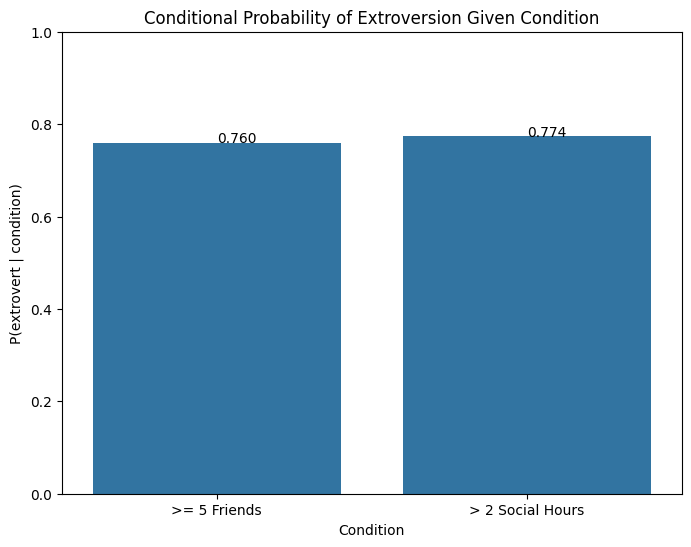

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
labels = ['>= 5 Friends', '> 2 Social Hours']
ps = [probability_friends, probability_social]

sns.barplot(x=labels, y=ps)
plt.title("Conditional Probability of Extroversion Given Condition")
plt.xlabel("Condition")
plt.ylabel("P(extrovert | condition)")

for i in range(len(ps)):
  plt.text(i, ps[i], "{:.3f}".format(ps[i]))

plt.ylim(0, 1)
plt.show()

**Conclusions**


*   P(extrovert | ≥ 5 friends) = .76 and P(extrovert | > 2 social hours) = .774. These probabilities are relatively high and support our hypothesis that they these two metrics are good indicators of extroverts.
*   P((Good ∪ Excellent) | ≥ 5 Friends) = .623. We cannot really draw a definitive conclusion from this value. However, it suggests a mild correlation between above average academic performance given 5 or more friends.


*   P(passed exam | extracurricular involvement) = .516 and P(passed exam | ≥ 2 hours on social media). Our initial hypothesis seems to have been incorrect. Since both probabilities are near the 50% mark, it cannot be said that extracurricular involvement and social media usage are strong markers of negative academic performance.






**Spearman Corrleation**

In [ ]:
a_df = student_performance_df.copy()

ordinal = {'below average':1, 'average':2, 'good':3, 'excellent':4}
a_df['Score'] = a_df['AcademicPerformance'].str.strip().str.lower().map(ordinal)

a_df['NumberOfFriend'] = pd.to_numeric(a_df['NumberOfFriend'], errors='coerce')

a_filter = a_df[['NumberOfFriend', 'Score']].dropna()

rho, p = stats.spearmanr(a_filter['NumberOfFriend'], a_filter['Score'])
print(f"Spearman's rho: {rho:.3f}, p-value: {p:.4f}")

Spearman's rho: 0.282, p-value: 0.0056


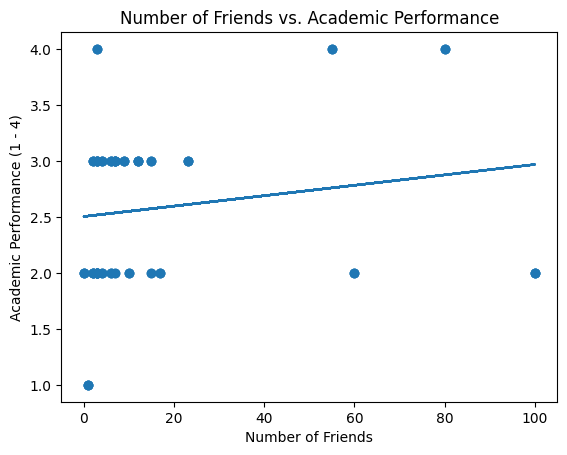

In [ ]:
scatter_df = a_df[['NumberOfFriend', 'Score']].dropna()

plt.figure()
plt.scatter(scatter_df['NumberOfFriend'], scatter_df['Score'])
slope, intercept = np.polyfit(scatter_df['NumberOfFriend'], scatter_df['Score'], 1)
plt.plot(scatter_df['NumberOfFriend'], slope * scatter_df['NumberOfFriend'] + intercept)
plt.xlabel('Number of Friends')
plt.ylabel('Academic Performance (1 - 4)')
plt.title('Number of Friends vs. Academic Performance')
plt.show()

**Conclusion**\
Spearman's Correlation (rho = 0.282, p = 0.0056)\
We see that there is a small positive association between the number of friends a student reported and their academic performance. Since the p-value is smaller than 0.01, we can safely conclude that this relationship is significant. Our conclusion being: students with larger friend networks, on average, tend to achieve slightly higher performance ratings. However, the effect is little in practice. Squaring the rho tells us that number of friends expalinsonly about 8% of the variations in the exam scores. The other 92% is determined by other factors. While the correlation between the two exists, correlation does not mean casuation.

**Hypothesis t-test and Spearman's (extra)**

In [ ]:
t_df = student_habit_df.copy()

for col in ['exam_score', 'social_media_hours', 'netflix_hours']:
  t_df[col] = pd.to_numeric(t_df[col], errors='coerce')

t_df = t_df.dropna(subset=['exam_score', 'social_media_hours', 'netflix_hours'])

rho_sm, p_sm = stats.spearmanr(t_df['social_media_hours'], t_df['exam_score'])
rho_nf, p_nf = stats.spearmanr(t_df['netflix_hours'], t_df['exam_score'])

print("Spearman Correlations")
print(f"Social Media Hours: rho = {rho_sm:.3f}, p = {p_sm:.10f}")
print(f"Netflix Hours: rho = {rho_nf:.3f}, p = {p_nf:.10f}")

yes_group = t_df[t_df['extracurricular_participation'] == 'Yes']['exam_score'].dropna()
no_group = t_df[t_df['extracurricular_participation'] == 'No']['exam_score'].dropna()

t_stat, p_val = stats.ttest_ind(yes_group, no_group, equal_var=False)
print("\nHypothesis t-test")
print(f"Mean for Yes: {yes_group.mean():.2f}, n = {len(yes_group)}")
print(f"Mean for No: {no_group.mean():.2f}, n = {len(no_group)}")
print(f"T-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

Spearman Correlations
Social Media Hours: rho = -0.166, p = 0.0000001238
Netflix Hours: rho = -0.165, p = 0.0000001492

Hypothesis t-test
Mean for Yes: 69.62, n = 318
Mean for No: 69.59, n = 682
T-statistic: 0.03, p-value: 0.9781


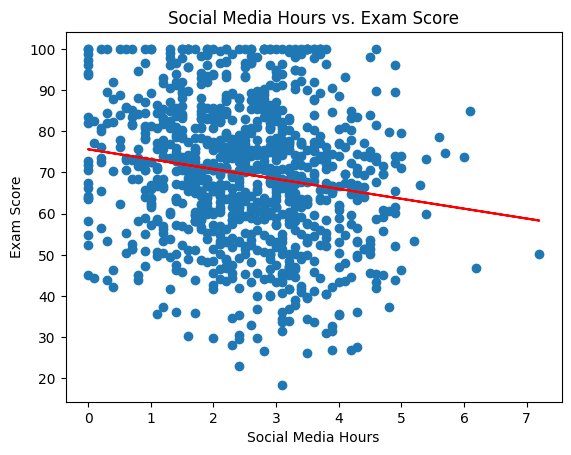

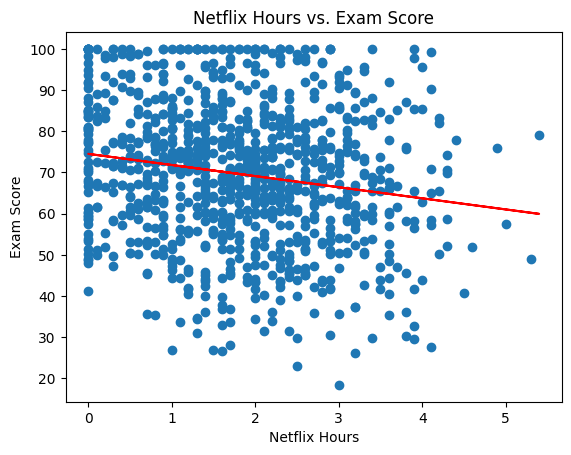

In [ ]:
plt.figure()
plt.scatter(t_df['social_media_hours'], t_df['exam_score'])
slope, intercept = np.polyfit(t_df['social_media_hours'], t_df['exam_score'], 1)
plt.plot(t_df['social_media_hours'], slope * t_df['social_media_hours'] + intercept, color='red')
plt.xlabel('Social Media Hours')
plt.ylabel('Exam Score')
plt.title('Social Media Hours vs. Exam Score')
plt.show()

plt.figure()
plt.scatter(t_df['netflix_hours'], t_df['exam_score'])
slope, intercept = np.polyfit(t_df['netflix_hours'], t_df['exam_score'], 1)
plt.plot(t_df['netflix_hours'], slope * t_df['netflix_hours'] + intercept, color='red')
plt.xlabel('Netflix Hours')
plt.ylabel('Exam Score')
plt.title('Netflix Hours vs. Exam Score')
plt.show()

<Figure size 640x480 with 0 Axes>

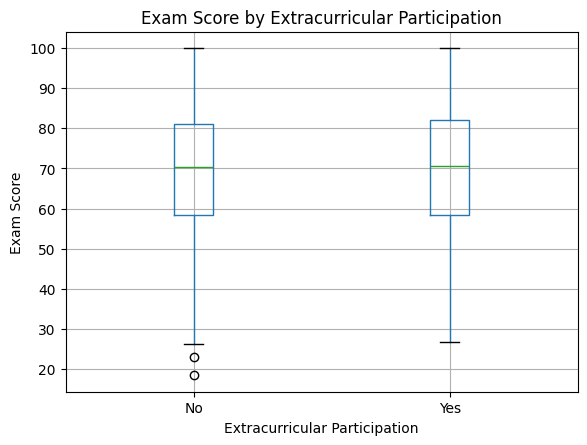

In [ ]:
plt.figure()
t_df[['extracurricular_participation', 'exam_score']].boxplot(column='exam_score', by='extracurricular_participation')
plt.xlabel('Extracurricular Participation')
plt.ylabel('Exam Score')
plt.title('Exam Score by Extracurricular Participation')
plt.suptitle('')
plt.show()

**Conclusion**
*  Social Media and Netflix Time spent vs. Exam Scores\
For both social media and netflix time spent vs. exam scores, we see a small negative correlation with rho approximately being -0.17. Although the low p-value indicate that the correlation is significant, squaring the rho explains the proportion of the variance which is about 3%. Meaning 97% of the score variation is due to other factors.
*  Extracurricular Participation vs. Exam Scores\
The t-test finds no difference at all between students who join extracurriculars or does not of their exam scores.